# Linear Regression
## Linear Regression function is shown as follows:
### f(x) = mx+b

To get the line equation, you calculate mean square error of the points to optimize the line so it has the least errors.
Finding the "line of best fit" from a bunch of points so we can predict new data

In [3]:
# Library Imports
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as pyplot
import pickle
from sklearn import linear_model
from sklearn.utils import shuffle
from matplotlib import style

In [10]:
#Using Pandas atrributes
data = pd.read_csv("forestfires.csv", sep=",")
print(data.head())

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [51]:
data = data[["FFMC", "ISI", "temp", "wind", "area"]]
print(data.head())

   FFMC  ISI  temp  wind  area
0  86.2  5.1   8.2   6.7   0.0
1  90.6  6.7  18.0   0.9   0.0
2  90.6  6.7  14.6   1.3   0.0
3  91.7  9.0   8.3   4.0   0.0
4  89.3  9.6  11.4   1.8   0.0


In [52]:
predict = "area"

#Set X and Y
x = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

In [53]:
# Split the data set into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [54]:
 linear = linear_model.LinearRegression()

# # Define the line of best fit
 linear.fit(x_train, y_train)
 acc = linear.score(x_test, y_test)
 print(acc)

-0.006825150378670042


In [46]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [47]:
# Load the pickle file
pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

In [19]:
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [-0.08221645  0.06897372 -0.00417218 -0.64404039  0.87159831 -0.21174294
  1.84736554 -2.19097992]
Intercept: 
 6.861193554447305


In [20]:
predictions = linear.predict(x_test)

for x in range(len(predictions)):
    print(predictions[x], x_test[x], y_test[x]) 

20.962877157384174 [ 93.7 231.1 715.1   8.4  21.9  42.    2.2   0. ] 174.63
16.816869450095098 [ 91.  129.5 692.6   7.   21.6  33.    2.2   0. ] 11.53
25.60381807240988 [ 94.8 227.  706.7  12.   25.   36.    4.    0. ] 0.0
16.837367029201914 [ 92.3  85.3 488.   14.7  22.2  29.    5.4   0. ] 0.0
13.557830320702813 [ 92.2 102.3 751.5   8.4  21.2  32.    2.2   0. ] 0.0
16.83478114980773 [ 91.2 147.8 377.2  12.7  19.6  43.    4.9   0. ] 0.0
8.681515504831033 [ 91.9 133.6 520.5   8.   14.2  58.    4.    0. ] 0.0
19.15607467705038 [ 94.9 130.3 587.1  14.1  23.4  40.    5.8   0. ] 1.29
14.701287957555376 [ 84.9  32.8 664.2   3.   19.1  32.    4.    0. ] 5.44
15.845314583499018 [ 91.  129.5 692.6   7.   21.7  38.    2.2   0. ] 0.43
14.026836914661494 [ 93.7  80.9 685.2  17.9  23.7  25.    4.5   0. ] 1.12
11.70738240119557 [ 92.5 122.  789.7  10.2  19.7  39.    2.7   0. ] 0.0
0.170130043563403 [ 92.  203.2 664.5   8.1  10.4  75.    0.9   0. ] 0.0
14.014008588676962 [ 91.2  94.3 744.4   8.4  22.

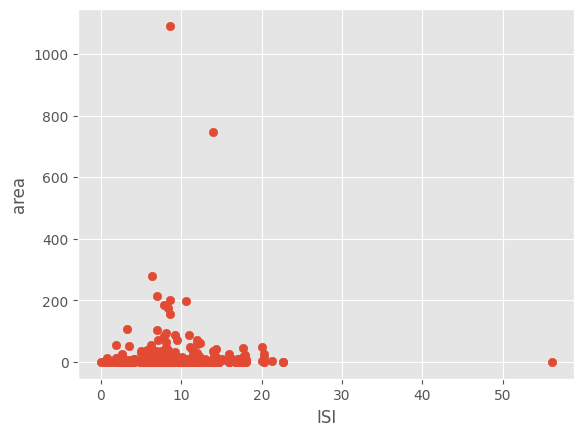

In [58]:
style.use("ggplot")

# Set up a scatter plot
p = "ISI"
pyplot.scatter(data[p], data["area"])
pyplot.xlabel(p)
pyplot.ylabel("area")
pyplot.show()